In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#MDP generation
#Salesman problem : expected reward in each city, cost of changing towns
nbTowns = 10
tCoord=np.random.rand(nbTowns,2) #coordinates of the towns
townReward = 1+5*np.random.rand(nbTowns) #expected reward for each town
townReward = np.arange(nbTowns)
gamma = 0.9 #discount factor
townDistance=np.zeros((nbTowns, nbTowns))
for i in range(nbTowns):
    for j in range(nbTowns):
        townDistance[i,j]=np.sqrt((tCoord[i,0]-tCoord[j,0])**2 + (tCoord[i,1]-tCoord[j,1])**2)
        townDistance[i,j]=((tCoord[i,0]-tCoord[j,0])**2 + (tCoord[i,1]-tCoord[j,1])**2)
        
townCost=1.0+1.0*townDistance

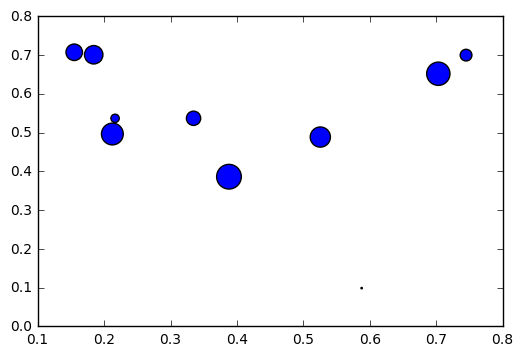

In [66]:
#plot towns

plt.scatter(tCoord[:,0],tCoord[:,1],marker='o',s=1+35*townReward)
plt.show()


In [ ]:
#SARSA Algorithm

nbSteps=1000000
alpha=0.1
epsilon=0.1

theta=10**(-7)
err=np.zeros(nbSteps)

#initialize Q
Q=np.zeros((nbTowns, nbTowns))
pi=(1.0/nbTowns)*np.ones((nbTowns, nbTowns))

#choose intial state
s=0
#take initial action 
a=int(np.random.choice(nbTowns, 1,p=pi[s,:])) #new state is S'=a

for t in range(nbSteps):
    alpha = np.log(t+1)/(t+1)
    err[t]=np.max(np.abs(Q-Q_star))
    #stop if convergence is reached
    if err[t]<theta :
        'Converged after', t, 'iterations'
        break
    
    if(t % (nbSteps / 10) )==0:
        print t
    
    #take action a from state s: go to town a
    #observe reward
    r=townReward[a]-townDistance[s,a]
    #take new action
    #print s,a
    b=int(np.random.choice(nbTowns, 1,p=pi[a,:]))
    
    #update Q
    Q[s,a]=Q[s,a]+alpha*(r+gamma*Q[a,b]-Q[s,a])
    
    #update pi
    #only Q[s,a] got updated, so only pi[a|s] needs to be updated (the other values stay the same)
    a_max = np.argmax(Q[s,:])
    pi[s,:]=(epsilon/nbTowns)*np.ones(nbTowns)
    pi[s,a_max]=1-epsilon+epsilon/nbTowns

    #update state and action
    s=a
    a=b

#cut if needed
err=err[range(t)]
    

0
100000
200000
300000
400000
500000
600000
700000
800000


In [54]:
Q_star=Q

In [59]:
print townReward
print pi
print Q

[0 1 2 3 4 5 6 7 8 9]
[[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.91]]
[[  0.00000000e+00   6.19794729e-01   1.99457184e+00   2.77332578e+00
    3.95805270e+00   4.76963932e+00   5.98802313e+00   6.59540891e+00
    7.80533931e+00   8.77243018e+00]
 [ -3.80185301e-01   9.99999742e-01   1.52790463e+00   2.90627356e+00
    3.32602879e+00   4.57569690e+00   5.70340439e+00   6.72096405e+00
    7.37111812e+00   8.3491786

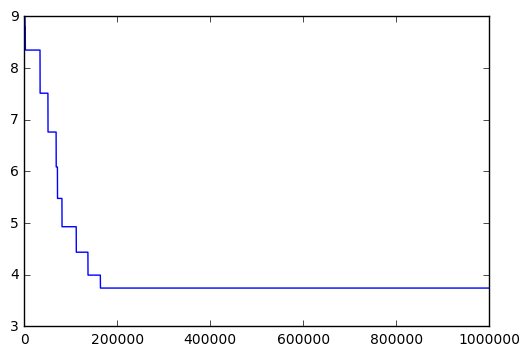

In [60]:
plt.plot(range(t),err)
plt.show()

[[ 0.49791172  0.98402254]
 [ 0.24987486  0.47055771]
 [ 0.3723899   0.54242591]
 [ 0.12661311  0.57057822]
 [ 0.85488612  0.86950855]
 [ 0.98822976  0.27757463]
 [ 0.83661904  0.40850328]
 [ 0.52977908  0.78979933]
 [ 0.41041123  0.67806914]
 [ 0.16994257  0.20462946]]
0 9
1 9
2 9
3 9
4 9
5 9
6 8
7 9
8 9
9 9


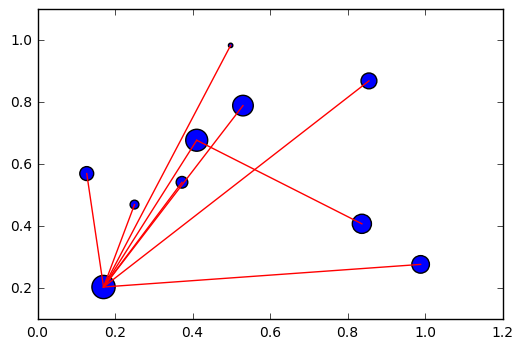

In [33]:
print tCoord

for i in range(nbTowns):
    for j in range(nbTowns):
        if pi[i,j]>0.9:
            print i,j
            plt.plot([tCoord[i,0],tCoord[j,0]],[tCoord[i,1],tCoord[j,1]],'-r')

plt.scatter(tCoord[:,0],tCoord[:,1],s=10+30*townReward)

plt.show()

In [63]:
print np.max(np.abs(Q-Q_star),0)

[ 0.2020408   0.43046695  0.77468862  1.16196063  1.54268834  2.25899443
  2.32452293  3.57090256  3.74295343  3.57143298]
